In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

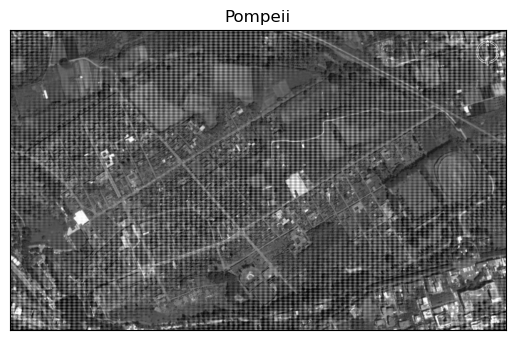

In [29]:
input=cv2.imread('q3_pompeii.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(input,cmap = 'gray')
plt.title('Pompeii'), plt.xticks([]), plt.yticks([])
plt.show()

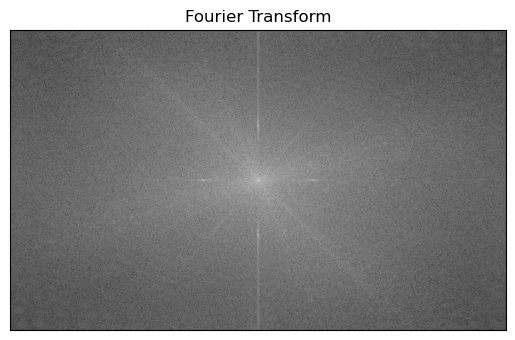

In [30]:
f_transform = np.fft.fft2(input)
f_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shifted))

plt.imshow(magnitude_spectrum, cmap='gray'),
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.show()

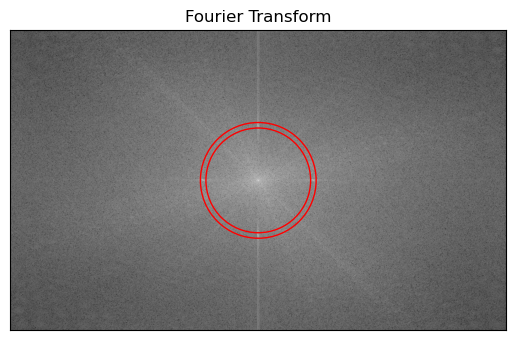

In [31]:
plt.imshow(magnitude_spectrum, cmap='gray'),
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])
center_x, center_y = magnitude_spectrum.shape[1] // 2, magnitude_spectrum.shape[0] // 2
circle = Circle((center_x, center_y), 95 , edgecolor='red', facecolor='none', linewidth=1)
circle2 = Circle((center_x, center_y), 105 , edgecolor='red', facecolor='none', linewidth=1)
plt.gca().add_patch(circle)
plt.gca().add_patch(circle2)
plt.show()

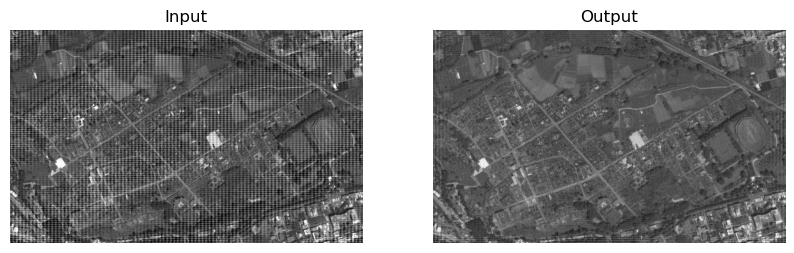

In [33]:
def circular_bandreject_filter(image, center, radius_low, radius_high):
    rows, cols = image.shape
    y, x = np.ogrid[:rows, :cols]
    # Create a circular mask in frequency space
    frequency_mask = np.zeros((rows, cols))
    radius = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    #isolate only the area between circles
    frequency_mask[(radius < radius_low) | (radius > radius_high)] = 1

   
    fft_image = np.fft.fftshift(np.fft.fft2(image))
    # Apply the mask to the Fourier transform of the image
    filtered_fft_image = fft_image * frequency_mask
    filtered_image = np.real(np.fft.ifft2(np.fft.ifftshift(filtered_fft_image)))
    return filtered_image

filtered_img = circular_bandreject_filter(input, 
                                          [magnitude_spectrum.shape[1] // 2, magnitude_spectrum.shape[0] // 2], 
                                          95, 105)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input, cmap='gray')
plt.title('Input')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray') 
plt.title('Output')
plt.axis('off')
plt.show()